<br><br><center><h1 style="font-size:2em;color:#2467C0">Project: Title</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/7/7b/Seattle_from_Kerry_Park_%281%29.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This Notebook  contains the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission corresponds to the whole project solution from defining the problem or task that is to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 
<br>
<br>
<br>
The data for this project is gathered from the web through a web scraping process using BeautifulSoup. Additional location data is gathered from Foursquare location service using their API.
<br>
<br>
<h1 style="font-size:1em;color:#2467C0">This Jupyter Notebook was created by: Gustavo Cedeño</h1>

</tr>
</table>

## Table of Contents
<ul>
    
<li><a href='#intro'>Introduction</a></li>
    <ul>
      <li><a href='#definition'>Problem or Idea Definition</a></li>
</ul>
    
    
<li><a href='#intro'>Project Description</a></li>
    <ul>
      <li><a href='#datasource'>DataSource</a></li>
      <li><a href='#requirements'> Required Libraries </a></li>
</ul>

<li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
      <li><a href='#gathering'>Gathering Data</a></li>
      <li><a href='#profil'>Data Profiling</a></li>
      <li><a href='#cleaning'>Assessing and Cleaning Data</a></li>
     
</ul>

<li><a href='#EDA'>Exploratory Data Analysis</a></li>
    <ul>
      <li><a href='#explore'>Exploring Data</a></li>
      <li><a href='#visuals'>Creating Visualizations</a></li>
      <li><a href='#p_insights'>Preliminary Insights</a></li>
          
</ul>

<li><a href='#method'>Methodology: Model and Predictive Data Analysis</a></li>
    <ul>
      <li><a href='#model'>Model Selection</a></li>
      <li><a href='#implementation'>Model Implementation</a></li>
      <li><a href='#evaluation'>Evaluating Model Performance</a></li>
  </ul>
   
<li><a href='#results'>Results</a></li>
    <ul>
      <li><a href='#discussion'>Discussion</a></li>
      <li><a href='#conclusion'>Conclusion</a></li>
    
</ul>
<li><a href='#reference'>References</a></li> 

<a id='intro'></a>
# Introduction

>This Notebook  contains the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission corresponds to the whole project solution from defining the problem or task that is to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 

>
<a id='definition'></a>
## Problem or Idea Definition

> 

<a id='projectdetails'></a>
# Project Details
>Main tasks in this project are as follows:
>1. Gathering data
>2. Assessing and cleaning data
>3. Creating Visualizations
>4. Using the Foursquare API to gather venues information.
>5. Clustering.
>6. Results analysis and giving recommedations.

<a id='datasource'></a>
## Data Source
> 

<a id='requirements'></a>
## System and Libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner
# library for data analysis
import pandas as pd 
import pandas_profiling

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#content extraction from a zip file 
import zipfile 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml
# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import pickle

print('Libraries imported.\n')

print("System and libraries version:\n")
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import pandas; print("Pandas",pandas.__version__)

Libraries imported.

System and libraries version:

Windows-10-10.0.17134-SP0
Python 3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
Scikit-Learn 0.20.2
NumPy 1.15.4
SciPy 1.1.0
Pandas 0.23.4


<a id='wrangling'></a>
# Data Wrangling
>>Data wrangling, which consists of the following tasks:
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing, analyzing, and visualizing the wrangled data

<a id='gathering'></a>
## Gathering Data
> 

In [2]:
with zipfile.ZipFile('seattle.zip','r') as seattle:
    seattle.extractall()

In [3]:
seattle_files = seattle.infolist()
seattle_files

[<ZipInfo filename='listings.csv' compress_type=deflate file_size=16871061 compress_size=3737330>,
 <ZipInfo filename='reviews.csv' compress_type=deflate file_size=36592035 compress_size=13135751>,
 <ZipInfo filename='calendar.csv' compress_type=deflate file_size=36650955 compress_size=3536858>]

In [4]:
df_list = pd.read_csv(seattle_files[0].filename)
print(df_list.shape)
df_list.head(3)

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
df_rev = pd.read_csv(seattle_files[1].filename)
print(df_rev.shape)
df_rev.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
df_cal = pd.read_csv(seattle_files[2].filename)
print(df_cal.shape)
df_cal.head(3)

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


<a id='profil'></a>
## Data Profiling
> 

In [7]:
#Data Profile Report for Listings: descriptions and average review score
profile_listings = pandas_profiling.ProfileReport(df_list)
#Exporting to HTML for better visualization
#profile_listings.to_file(outputfile="Seattle_listings_data_profiling.html")
profile_listings

Number of variables,92
Number of observations,3818
Total Missing (%),8.5%
Total size in memory,2.7 MiB
Average record size in memory,736.0 B
Numeric,25
Categorical,51
Boolean,0
Date,0
Text (Unique),2
Rejected,14


In [8]:
#Data Profile Report for reviews: unique id for each reviewer and detailed commments
profile_reviews = pandas_profiling.ProfileReport(df_rev)
#Exporting to HTML for better visualization
#profile_reviews.to_file(outputfile="Seattle_reviews_data_profiling.html")
profile_reviews

Number of variables,6
Number of observations,84849
Total Missing (%),0.0%
Total size in memory,3.9 MiB
Average record size in memory,48.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [9]:
#Data Profile Report for calendar: listing id, price and availability for that day
profile_calendar = pandas_profiling.ProfileReport(df_cal)
#Exporting to HTML for better visualization
#profile_calendar.to_file(outputfile="Seattle_calendar_data_profiling.html")
profile_calendar

Number of variables,4
Number of observations,1393570
Total Missing (%),8.2%
Total size in memory,42.5 MiB
Average record size in memory,32.0 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<a id='cleaning'></a>
## Assessing and Cleaning Data
> **Listings:** there are 92 variables in this df and not all of them are relevant for the analysis, are not easy to interpret or have too many missing values, so to start with, I will create a new listings df containing only the relevant features. Then change data types and handle missing values if any. 

>**Reviews:** there are no missing values, but some variables need to be changed to a suitable data type, like for instance date must be a datatime type. Information about reviewers is not needed, so I will drop the columns `reviewer_name` and `reviewer_id`

>**Calendar:** some variables have inappropriate data types; date must be datetimestamp and price should be numeric. Moreover `available` should be boolean and for all the dataframes, id should be string since it is not a variable meant to be used for calculations.

In [10]:
#Selecting features for new listings df
list_vars =['id','accommodates','bathrooms','bedrooms','beds','cancellation_policy','host_is_superhost','property_type', 
          'room_type','neighbourhood', 'neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude', 'price']

df_list_new = df_list[list_vars]
df_list_new.head()

,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,241032,4,1.0,1.0,1.0,moderate,f,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.636289,-122.371025,$85.00
1,953595,4,1.0,1.0,1.0,strict,t,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.639123,-122.365666,$150.00
2,3308979,11,4.5,5.0,7.0,strict,f,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.629724,-122.369483,$975.00
3,7421966,3,1.0,0.0,2.0,flexible,f,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.638473,-122.369279,$100.00
4,278830,6,2.0,3.0,3.0,strict,f,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.632918,-122.372471,$450.00


In [11]:
#Quick profile check of the resulting df
pandas_profiling.ProfileReport(df_list_new)

Number of variables,15
Number of observations,3818
Total Missing (%),0.8%
Total size in memory,447.5 KiB
Average record size in memory,120.0 B
Numeric,7
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


* `host_is_superhost`: a boolean data type would represent its intended meaning better.
* `price`: get rid of the $ string and convert to numeric. 
*  Missing values: `host_is_superhost`:impute the 2 missing values with false. `neighbourhood`: if not given, take the corresponding value from `neighbourhood_cleansed`. Impute other values with the mean of the column

In [16]:
df_list_new.replace({'host_is_superhost':{'t':1,'f':0}},inplace=True)
df_list_new['host_is_superhost'].fillna(value=0, inplace =True)
print(df_list_new['host_is_superhost'].isnull().sum())
df_list_new['host_is_superhost'].values

C:\Users\Gustavo\Anaconda3\lib\site-packages\pandas\core\generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


0

In [18]:
#Function for fixing values in  price column
def fix_prices(df):
    df['price'] = df['price'].str.replace('$','').str.replace(',','');
    df['price'] = pd.to_numeric(df['price']);

In [19]:
fix_prices(df_list_new)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
df_list_new.head()

,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.636289,-122.371025,85.0
1,953595,4,1.0,1.0,1.0,strict,1,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.639123,-122.365666,150.0
2,3308979,11,4.5,5.0,7.0,strict,0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.629724,-122.369483,975.0
3,7421966,3,1.0,0.0,2.0,flexible,0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.638473,-122.369279,100.0
4,278830,6,2.0,3.0,3.0,strict,0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.632918,-122.372471,450.0


In [21]:
df_list_new['neighbourhood'].fillna(value=df_list_new['neighbourhood_cleansed'], inplace =True)
df_list_new['neighbourhood'].isnull().sum()

0

In [22]:
#drop the row without a property_type description
df_list_new.dropna(subset=['property_type'],how='any',axis=0,inplace=True)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
#Filling NaNs with the mean values in the column
nan_cols = ['bathrooms','bedrooms','beds']
for col in nan_cols:
    df_list_new[col].fillna(value=round(df_list_new[col].mean()),inplace=True)
df_list_new.isnull().sum()

id                              0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
cancellation_policy             0
host_is_superhost               0
property_type                   0
room_type                       0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
price                           0
dtype: int64

In [24]:
#Reviews dataframe
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [25]:
#cleaning operations
df_rev.drop(['reviewer_id','reviewer_name'],axis=1,inplace=True)
df_rev['date'] = df_rev['date'].astype('datetime64[ns]')
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 4 columns):
listing_id    84849 non-null int64
id            84849 non-null int64
date          84849 non-null datetime64[ns]
comments      84831 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.6+ MB


In [26]:
#calendar dataframe
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [27]:
#fixing the price values
fix_prices(df_cal)
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [28]:
df_cal['date'] = df_cal['date'].astype('datetime64[ns]')
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [29]:
df_cal_copy = df_cal.copy()

In [30]:
#Creating occupancy df before droping rows with missing price values
df_cal_copy['available'] = df_cal_copy['available'].map(lambda x:1 if x == 't' else 0)
df_occup = df_cal_copy[['date','available']].groupby('date',as_index=False).mean()
df_occup['occupancy'] = 1-df_occup['available']
print(df_occup.shape)
df_occup.head()

(365, 3)


,date,available,occupancy
0,2016-01-04,0.454426,0.545574
1,2016-01-05,0.488999,0.511001
2,2016-01-06,0.478261,0.521739
3,2016-01-07,0.465165,0.534835
4,2016-01-08,0.466737,0.533263


In [31]:
#drop rows without price
df_cal.dropna(subset=['price'],how='any',axis=0,inplace=True)
df_cal.isnull().any()

listing_id    False
date          False
available     False
price         False
dtype: bool

In [32]:
#Saving the dfs for later use
file_Name1 = "df_list_clean.pkl"
file_Name2 = "df_rev_clean.pkl"
file_Name3 = "df_cal_clean.pkl"
file_Name4 = "df_occup.pkl"
# open the file for writing
fileObject1 = open(file_Name1,'wb') 
fileObject2 = open(file_Name2,'wb') 
fileObject3 = open(file_Name3,'wb')
fileObject4 = open(file_Name4,'wb')
# this writes the object df to the
# file named "df_x_.pkl"
pickle.dump(df_list_new,fileObject1)   
pickle.dump(df_rev,fileObject2)
pickle.dump(df_cal,fileObject3)
pickle.dump(df_occup,fileObject4)
# closing the fileObject
fileObject1.close()
fileObject2.close()
fileObject3.close()
fileObject4.close()

<a id='EDA'></a>
# Exploratory Data Analysis
> 

In [33]:
#Opening the pickled df_list
df_list_clean = pd.read_pickle("df_list_clean.pkl")
print(df_list_clean.shape)
df_list_clean.head()

(3817, 15)


,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,price
0,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.636289,-122.371025,85.0
1,953595,4,1.0,1.0,1.0,strict,1,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.639123,-122.365666,150.0
2,3308979,11,4.5,5.0,7.0,strict,0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.629724,-122.369483,975.0
3,7421966,3,1.0,0.0,2.0,flexible,0,Apartment,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.638473,-122.369279,100.0
4,278830,6,2.0,3.0,3.0,strict,0,House,Entire home/apt,Queen Anne,West Queen Anne,Queen Anne,47.632918,-122.372471,450.0


In [34]:
#Opening the pickled df_rev
df_rev_clean = pd.read_pickle("df_rev_clean.pkl")
print(df_rev_clean.shape)
df_rev_clean.head()

(84849, 4)


,listing_id,id,date,comments
0,7202016,38917982,2015-07-19,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,Kelly was a great host and very accommodating ...


In [35]:
#Opening the pickled df_cal
df_cal_clean = pd.read_pickle("df_cal_clean.pkl")
print(df_cal_clean.shape)
df_cal_clean.head()

(934542, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


<a id='explore'></a>
## Exploring Data
>  

In [36]:
#Getting the mean price per month
mean_month = df_cal_clean.groupby(df_cal['date'].dt.strftime('%B'),sort=False)['price'].mean()
mean_month

date
January      122.912176
February     124.293927
March        128.644488
April        135.097005
May          139.538183
June         147.473137
July         152.094150
August       150.656594
September    143.255949
October      137.031939
November     135.688738
December     137.251835
Name: price, dtype: float64

In [37]:
#Creating a variable containing the months
months=list(mean_month.index)

In [38]:
#Count of property types
prop_type_count = df_list_clean['property_type'].value_counts()
prop_type_count

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [39]:
#Replace values repeated less than 1% to 'other'
def replace_cat(col,df):
    val_counts = df[col].value_counts()
    total = df[col].count()
    for c in range(len(val_counts)):
        val = val_counts.values[c] 
        ind = val_counts.index[c]
        if (val/total)*100 <= 0.94:
            df[col]=df[col].replace(ind,'Other');

In [40]:
replace_cat('property_type',df_list_clean)

In [41]:
#Mean price per "property_type"
price_property = df_list_clean.groupby('property_type')['price'].mean().sort_values(ascending=False)
price_property 

property_type
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Other              117.311111
Bed & Breakfast    112.054054
Name: price, dtype: float64

In [42]:
#Mean price per "neighbourhood_cleansed"
price_neigh_cleansed = df_list_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
price_neigh_cleansed.head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

In [43]:
len(price_neigh_cleansed.index)

87

In [44]:
#Mean price per "neighbourhood"
price_neigh= df_list_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
len(price_neigh.index)

96

In [45]:
#Booking 
df_occup = pd.read_pickle("df_occup.pkl")
print(df_occup.shape)
df_occup.head()

(365, 3)


,date,available,occupancy
0,2016-01-04,0.454426,0.545574
1,2016-01-05,0.488999,0.511001
2,2016-01-06,0.478261,0.521739
3,2016-01-07,0.465165,0.534835
4,2016-01-08,0.466737,0.533263


In [46]:
#Mean occupancy per month
occup_month = df_occup.groupby(df_occup['date'].dt.strftime('%B'),sort=False)['occupancy'].mean()
occup_month

date
January      0.433063
February     0.337792
March        0.290813
April        0.336153
May          0.324330
June         0.325616
July         0.372903
August       0.354949
September    0.325598
October      0.303486
November     0.286014
December     0.264427
Name: occupancy, dtype: float64

<a id='visuals'></a>
## Creating Visualizations
> 

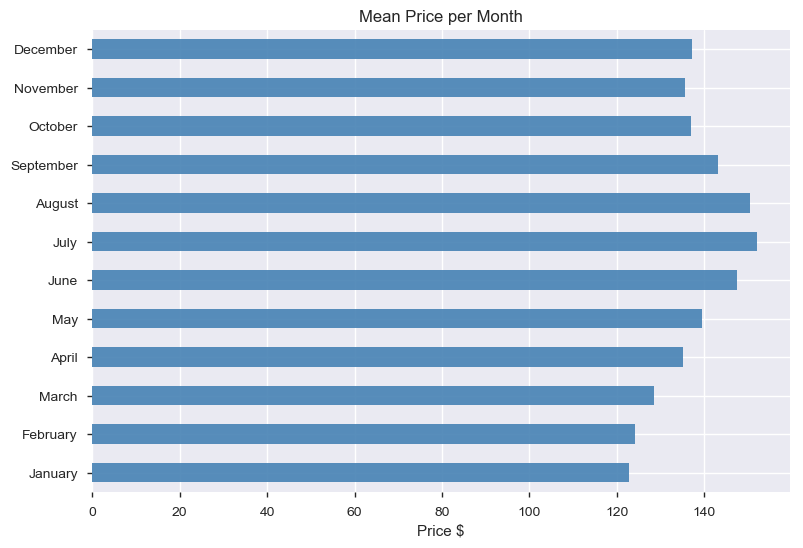

In [47]:
mean_month.plot(kind = 'barh',figsize=(9,6),alpha=0.9,color='steelblue');
plt.ylabel('');
plt.xlabel('Price $');
plt.title('Mean Price per Month');
plt.show()

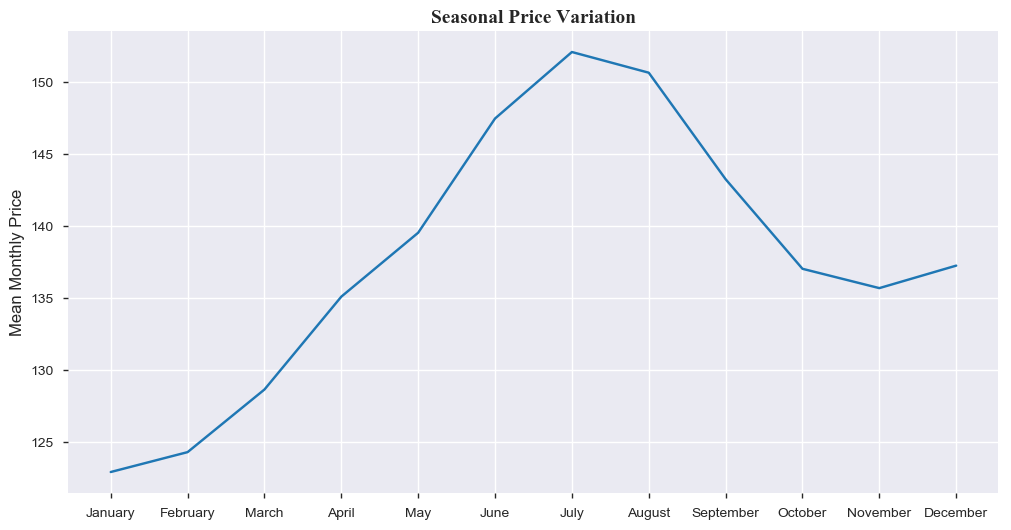

In [48]:
#Seasonal price variation plot
plt.rcParams["figure.figsize"] = [12, 6] 
plt.plot(months, mean_month);
plt.ylabel("Mean Monthly Price",fontsize = 12);
plt.title('Seasonal Price Variation',fontsize = 14,
            fontname="Times New Roman",fontweight="bold");

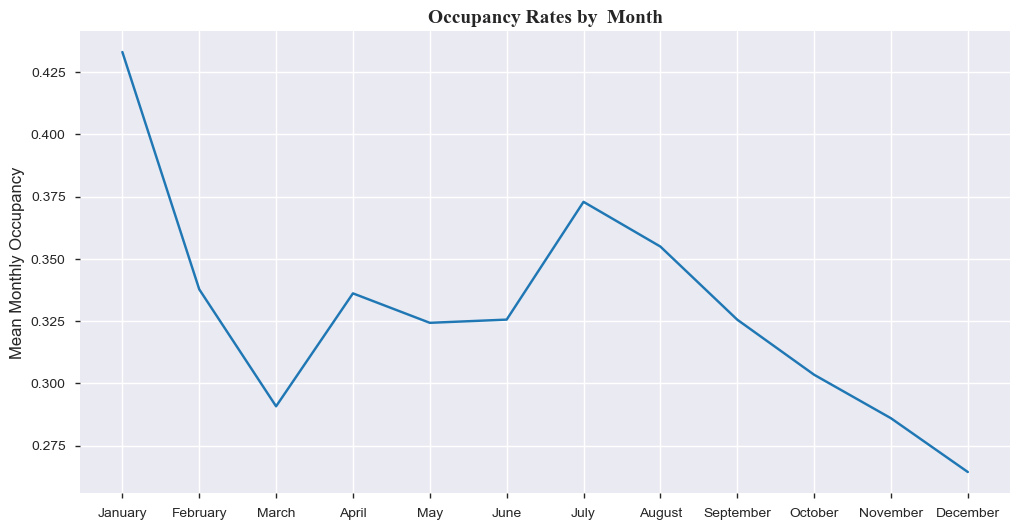

In [49]:
#Occupancy Rate by Month
plt.rcParams["figure.figsize"] = [12, 6] 
plt.plot(occup_month.index, occup_month.values);
plt.ylabel("Mean Monthly Occupancy",fontsize = 12);
plt.title('Occupancy Rates by  Month',fontsize = 14,
            fontname="Times New Roman",fontweight="bold");

In [50]:
#Function for quick count plots
def plot_counts (col,df):
    df[col].value_counts().plot(kind = 'barh' , figsize = (12,8),alpha=0.9,color='steelblue');
    plt.title(col.capitalize(),fontsize = 14,
            fontname="Times New Roman",fontweight="bold");
    plt.show()

In [51]:
df_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 15 columns):
id                              3817 non-null int64
accommodates                    3817 non-null int64
bathrooms                       3817 non-null float64
bedrooms                        3817 non-null float64
beds                            3817 non-null float64
cancellation_policy             3817 non-null object
host_is_superhost               3817 non-null int64
property_type                   3817 non-null object
room_type                       3817 non-null object
neighbourhood                   3817 non-null object
neighbourhood_cleansed          3817 non-null object
neighbourhood_group_cleansed    3817 non-null object
latitude                        3817 non-null float64
longitude                       3817 non-null float64
price                           3817 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 477.1+ KB


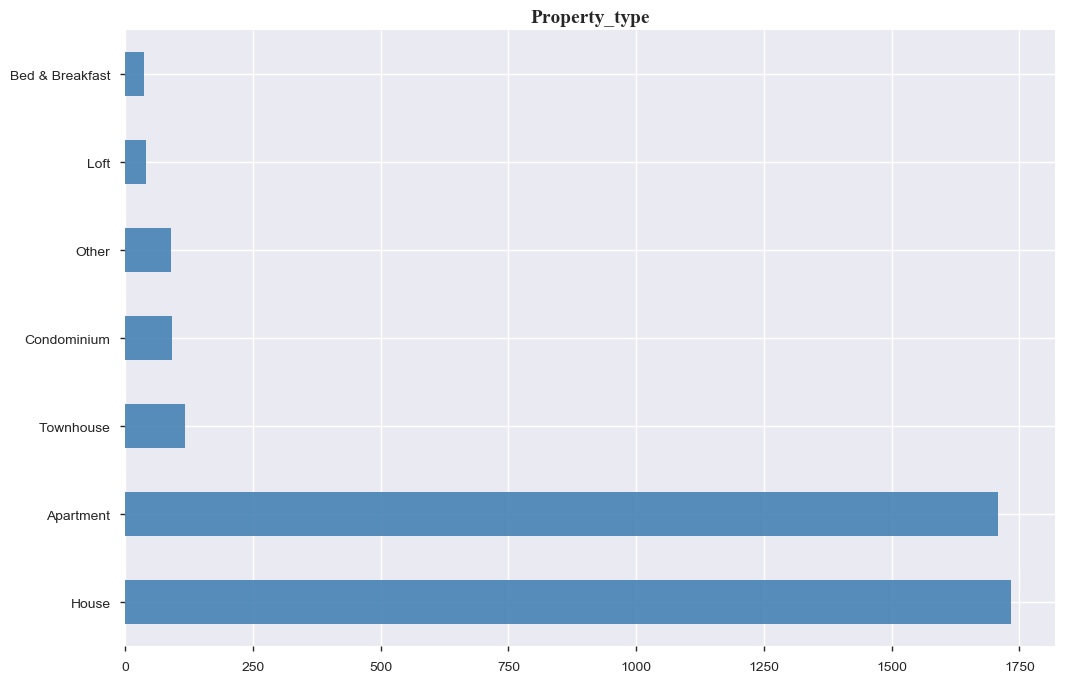

In [52]:
plot_counts('property_type',df_list_clean)

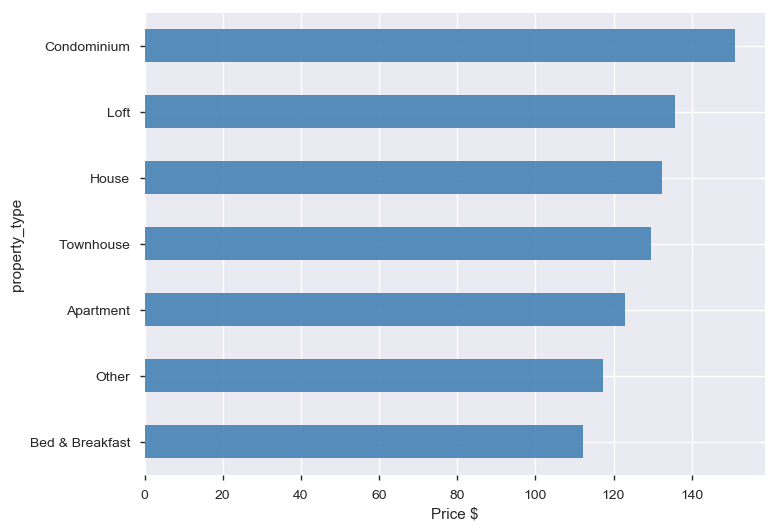

In [53]:
price_property.sort_values(ascending=True).plot(kind = 'barh' , figsize = (8,6),alpha=0.9,color='steelblue');
plt.xlabel('Price $')
plt.show()

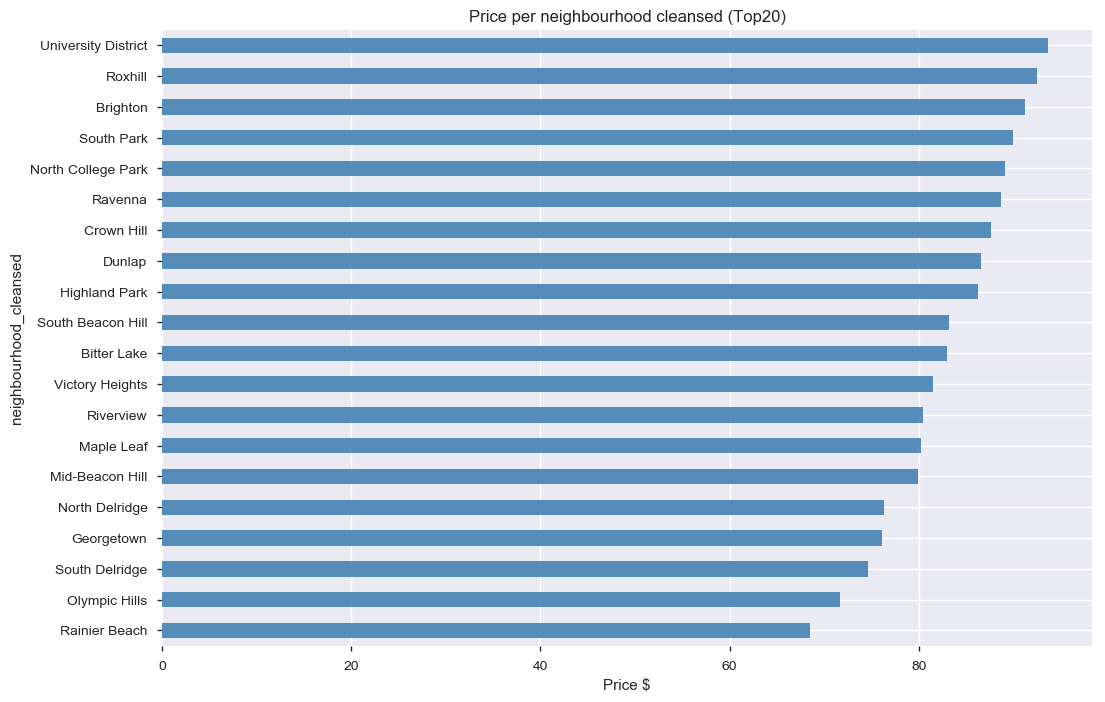

In [54]:
price_neigh_cleansed.sort_values(ascending=True).head(20).plot(kind = 'barh' , figsize = (12,8),alpha=0.9,color='steelblue');
plt.xlabel('Price $')
plt.title('Price per neighbourhood cleansed (Top20)')
plt.show()

<a id='p_insights'></a>
## Preliminary Insights
> 

### Seasonal Price Variation

### Occupancy per Month

### Common Property Types

### Price variation per location

### 

<a id='method'></a>
# Methodology

>Since the goal is predicting price which happens to be a continuous variable(a float) from some selected features, then we are clearly talking about a regression task. Based on the previous exploratory data analysis, there is a strong seasonal price variation with higher price values happening during the summer (june to august). So, the focus here will be on trying to understand the influence other variables have in price. 

In [55]:
#Creating the final dataframe
df_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 15 columns):
id                              3817 non-null int64
accommodates                    3817 non-null int64
bathrooms                       3817 non-null float64
bedrooms                        3817 non-null float64
beds                            3817 non-null float64
cancellation_policy             3817 non-null object
host_is_superhost               3817 non-null int64
property_type                   3817 non-null object
room_type                       3817 non-null object
neighbourhood                   3817 non-null object
neighbourhood_cleansed          3817 non-null object
neighbourhood_group_cleansed    3817 non-null object
latitude                        3817 non-null float64
longitude                       3817 non-null float64
price                           3817 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 477.1+ KB


In [56]:
#Selecting final features from listings
feats =['id','accommodates','bathrooms','bedrooms','beds','cancellation_policy','host_is_superhost','property_type', 
          'room_type','neighbourhood_group_cleansed']
data_list = df_list_clean[feats]
data_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 10 columns):
id                              3817 non-null int64
accommodates                    3817 non-null int64
bathrooms                       3817 non-null float64
bedrooms                        3817 non-null float64
beds                            3817 non-null float64
cancellation_policy             3817 non-null object
host_is_superhost               3817 non-null int64
property_type                   3817 non-null object
room_type                       3817 non-null object
neighbourhood_group_cleansed    3817 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 328.0+ KB


In [57]:
#Selecting features from calendar
df_cal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [63]:
data_cal=df_cal_clean.copy()

In [64]:
#For price prediction, month and weekday are interesting features
data_cal['weekday'] = df_cal_clean['date'].dt.weekday #Monday=0, Sunday=6
data_cal['month'] = df_cal_clean['date'].dt.month
data_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
weekday       934542 non-null int64
month         934542 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 49.9+ MB


In [65]:
data_cal.drop(['date','available'],axis=1,inplace=True)
data_cal.head()

,listing_id,price,weekday,month
0,241032,85.0,0,1
1,241032,85.0,1,1
9,241032,85.0,2,1
10,241032,85.0,3,1
14,241032,85.0,0,1


In [66]:
#Merging the datasets
df_merged=pd.merge(data_cal,data_list,left_on ='listing_id',right_on='id',how='inner')
df_merged.head()

,listing_id,price,weekday,month,id,accommodates,bathrooms,bedrooms,beds,cancellation_policy,host_is_superhost,property_type,room_type,neighbourhood_group_cleansed
0,241032,85.0,0,1,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne
1,241032,85.0,1,1,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne
2,241032,85.0,2,1,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne
3,241032,85.0,3,1,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne
4,241032,85.0,0,1,241032,4,1.0,1.0,1.0,moderate,0,Apartment,Entire home/apt,Queen Anne


In [69]:
# id's are not needed anymore
df_merged.drop(['listing_id','id'],axis=1,inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934233 entries, 0 to 934232
Data columns (total 12 columns):
price                           934233 non-null float64
weekday                         934233 non-null int64
month                           934233 non-null int64
accommodates                    934233 non-null int64
bathrooms                       934233 non-null float64
bedrooms                        934233 non-null float64
beds                            934233 non-null float64
cancellation_policy             934233 non-null object
host_is_superhost               934233 non-null int64
property_type                   934233 non-null object
room_type                       934233 non-null object
neighbourhood_group_cleansed    934233 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 92.7+ MB


In [73]:
#renaming large column name
df_merged.rename(index=str,columns={'neighbourhood_group_cleansed':'place'},inplace=True)

In [74]:
df_final = df_merged.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934233 entries, 0 to 934232
Data columns (total 12 columns):
price                  934233 non-null float64
weekday                934233 non-null int64
month                  934233 non-null int64
accommodates           934233 non-null int64
bathrooms              934233 non-null float64
bedrooms               934233 non-null float64
beds                   934233 non-null float64
cancellation_policy    934233 non-null object
host_is_superhost      934233 non-null int64
property_type          934233 non-null object
room_type              934233 non-null object
place                  934233 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 92.7+ MB


In [75]:
#Selecting categorical variables to re-encode
cat_features=['cancellation_policy','property_type','room_type','place']
df_final = pd.get_dummies(df_merged,columns=cat_features,dummy_na=False)

,price,weekday,month,accommodates,bathrooms,bedrooms,beds,host_is_superhost,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,property_type_Apartment,property_type_Bed & Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,place_Ballard,place_Beacon Hill,place_Capitol Hill,place_Cascade,place_Central Area,place_Delridge,place_Downtown,place_Interbay,place_Lake City,place_Magnolia,place_Northgate,place_Other neighborhoods,place_Queen Anne,place_Rainier Valley,place_Seward Park,place_University District,place_West Seattle
0,85.0,0,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,85.0,1,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,85.0,2,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,85.0,3,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,85.0,0,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [76]:
print(df_final.shape)
df_final.head()

(934233, 38)


,price,weekday,month,accommodates,bathrooms,bedrooms,beds,host_is_superhost,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,property_type_Apartment,property_type_Bed & Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,place_Ballard,place_Beacon Hill,place_Capitol Hill,place_Cascade,place_Central Area,place_Delridge,place_Downtown,place_Interbay,place_Lake City,place_Magnolia,place_Northgate,place_Other neighborhoods,place_Queen Anne,place_Rainier Valley,place_Seward Park,place_University District,place_West Seattle
0,85.0,0,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,85.0,1,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,85.0,2,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,85.0,3,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,85.0,0,1,4,1.0,1.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [77]:
#Saving the df_final for later use
file_Name = "df_final.pkl"
# open the file for writing
fileObject = open(file_Name,'wb') 
# writing the object df to the
# file named "df_final.pkl"
pickle.dump(df_final,fileObject)   
# here we close the fileObject
fileObject.close()

In [79]:
data_final=pd.read_pickle("df_final.pkl")
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934233 entries, 0 to 934232
Data columns (total 38 columns):
price                            934233 non-null float64
weekday                          934233 non-null int64
month                            934233 non-null int64
accommodates                     934233 non-null int64
bathrooms                        934233 non-null float64
bedrooms                         934233 non-null float64
beds                             934233 non-null float64
host_is_superhost                934233 non-null int64
cancellation_policy_flexible     934233 non-null uint8
cancellation_policy_moderate     934233 non-null uint8
cancellation_policy_strict       934233 non-null uint8
property_type_Apartment          934233 non-null uint8
property_type_Bed & Breakfast    934233 non-null uint8
property_type_Condominium        934233 non-null uint8
property_type_House              934233 non-null uint8
property_type_Loft               934233 non-null uint8
proper

In [86]:
# Split the data into features and target label
target = data_final['price']
features = data_final.drop('price', axis = 1)

<a id='model'></a>
## Model Selection
> For this dataset I will use a linear regression model, starting with a simple linear model and then testing additional ridge and lasso variations

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

<a id='implementation'></a>
## Model Implementation

In [88]:
#Pre-processing data
#Data Normalization //// Test without normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(features)
y= target
#Split into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [95]:
#Function for model training and prediction
def train_predict(model):
    model_name = model.__class__.__name__
    #training the model
    model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)

    #Score the model
    #test data
    test_score_r2 = r2_score(y_test, y_test_preds)
    test_score_mse = mean_squared_error(y_test, y_test_preds)
    #training data
    train_score_r2 = r2_score(y_train, y_train_preds)
    train_score_mse = mean_squared_error(y_train, y_train_preds)

    #Print training and testing score
    print('\nResults for {} Model:\n'.format(model_name))
    print("The R^2 score on the training data was {:.4f}.  The R^2 score on the test data was {:.4f}.\n".format(train_score_r2, test_score_r2))
    print("The mean_squared_error on the training data was {:.4f}.  The mean_squared_error on the test data was {:.4f}.\n".format(train_score_mse, test_score_mse))

<a id='evaluation'></a>
## Evaluating Model Performance

In [96]:
#Instantiatng models with default parameters
M1 = LinearRegression(random_state=42) #linear regression
M2 = Ridge(random_state=42) #ridge regression
M3 = Lasso(random_state=42) #lasso regression
for model in [M1,M2,M3]:
    train_predict(model)


Results for LinearRegression Model:

The R^2 score on the training data was 0.5999.  The R^2 score on the test data was 0.5993.

The mean_squared_error on the training data was 4447.0511.  The mean_squared_error on the test data was 4357.2966.


Results for Ridge Model:

The R^2 score on the training data was 0.5999.  The R^2 score on the test data was 0.5993.

The mean_squared_error on the training data was 4447.0383.  The mean_squared_error on the test data was 4357.2218.


Results for Lasso Model:

The R^2 score on the training data was 0.5643.  The R^2 score on the test data was 0.5646.

The mean_squared_error on the training data was 4842.4138.  The mean_squared_error on the test data was 4734.1597.



In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Unoptimized model
clf= Ridge(random_state=42)

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

# TODO: Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer,cv=2,verbose=1)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R^2 score on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final R^2 score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))

Fitting 2 folds for each of 13 candidates, totalling 26 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   25.6s finished


Unoptimized model
------
R^2 score on testing data: 0.5993

Optimized Model
------
Final R^2 score on the testing data: 0.5993


In [105]:
clf

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [104]:
best_clf

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

<a id='results'></a>
# Results

In [97]:
#Feature Importance
best_model = M2
#Getting the coefficients
coef = best_model.coef_
# to get the order of index
ind = np.argsort(-abs(coef))

In [102]:
coef

array([  5.60574505,  10.00204084, 171.7801793 , 286.37082401,
       245.4216912 ,  40.1253053 ,  11.95327022,   1.65731331,
        -6.29209113,   4.63477184,  -7.39956875,   8.1383732 ,
        -1.47404274,  -4.86087478,  10.55854458,   9.95110503,
       -14.91353675,  37.8294015 ,   1.21743393, -39.04683632,
       -11.35237165, -16.24222168,  17.47956117,  32.15533296,
        -8.71249242, -23.63137422,  47.52575402,  11.55789961,
       -17.62408986,  27.27095335, -28.64549863,  -4.66542314,
        30.55866801, -21.75744485, -25.4118267 ,  -7.89159151,
        -0.61383328])

In [99]:
features.columns[ind][:30]

Index(['bathrooms', 'bedrooms', 'accommodates', 'place_Downtown', 'beds',
       'room_type_Shared room', 'room_type_Entire home/apt', 'place_Cascade',
       'place_Queen Anne', 'place_Northgate', 'place_Magnolia',
       'place_Seward Park', 'place_Delridge', 'place_Rainier Valley',
       'place_Lake City', 'place_Capitol Hill', 'place_Beacon Hill',
       'property_type_Townhouse', 'host_is_superhost', 'place_Interbay',
       'place_Ballard', 'property_type_Loft', 'month', 'property_type_Other',
       'place_Central Area', 'property_type_Bed & Breakfast',
       'place_University District', 'property_type_Apartment',
       'cancellation_policy_moderate', 'weekday'],
      dtype='object')

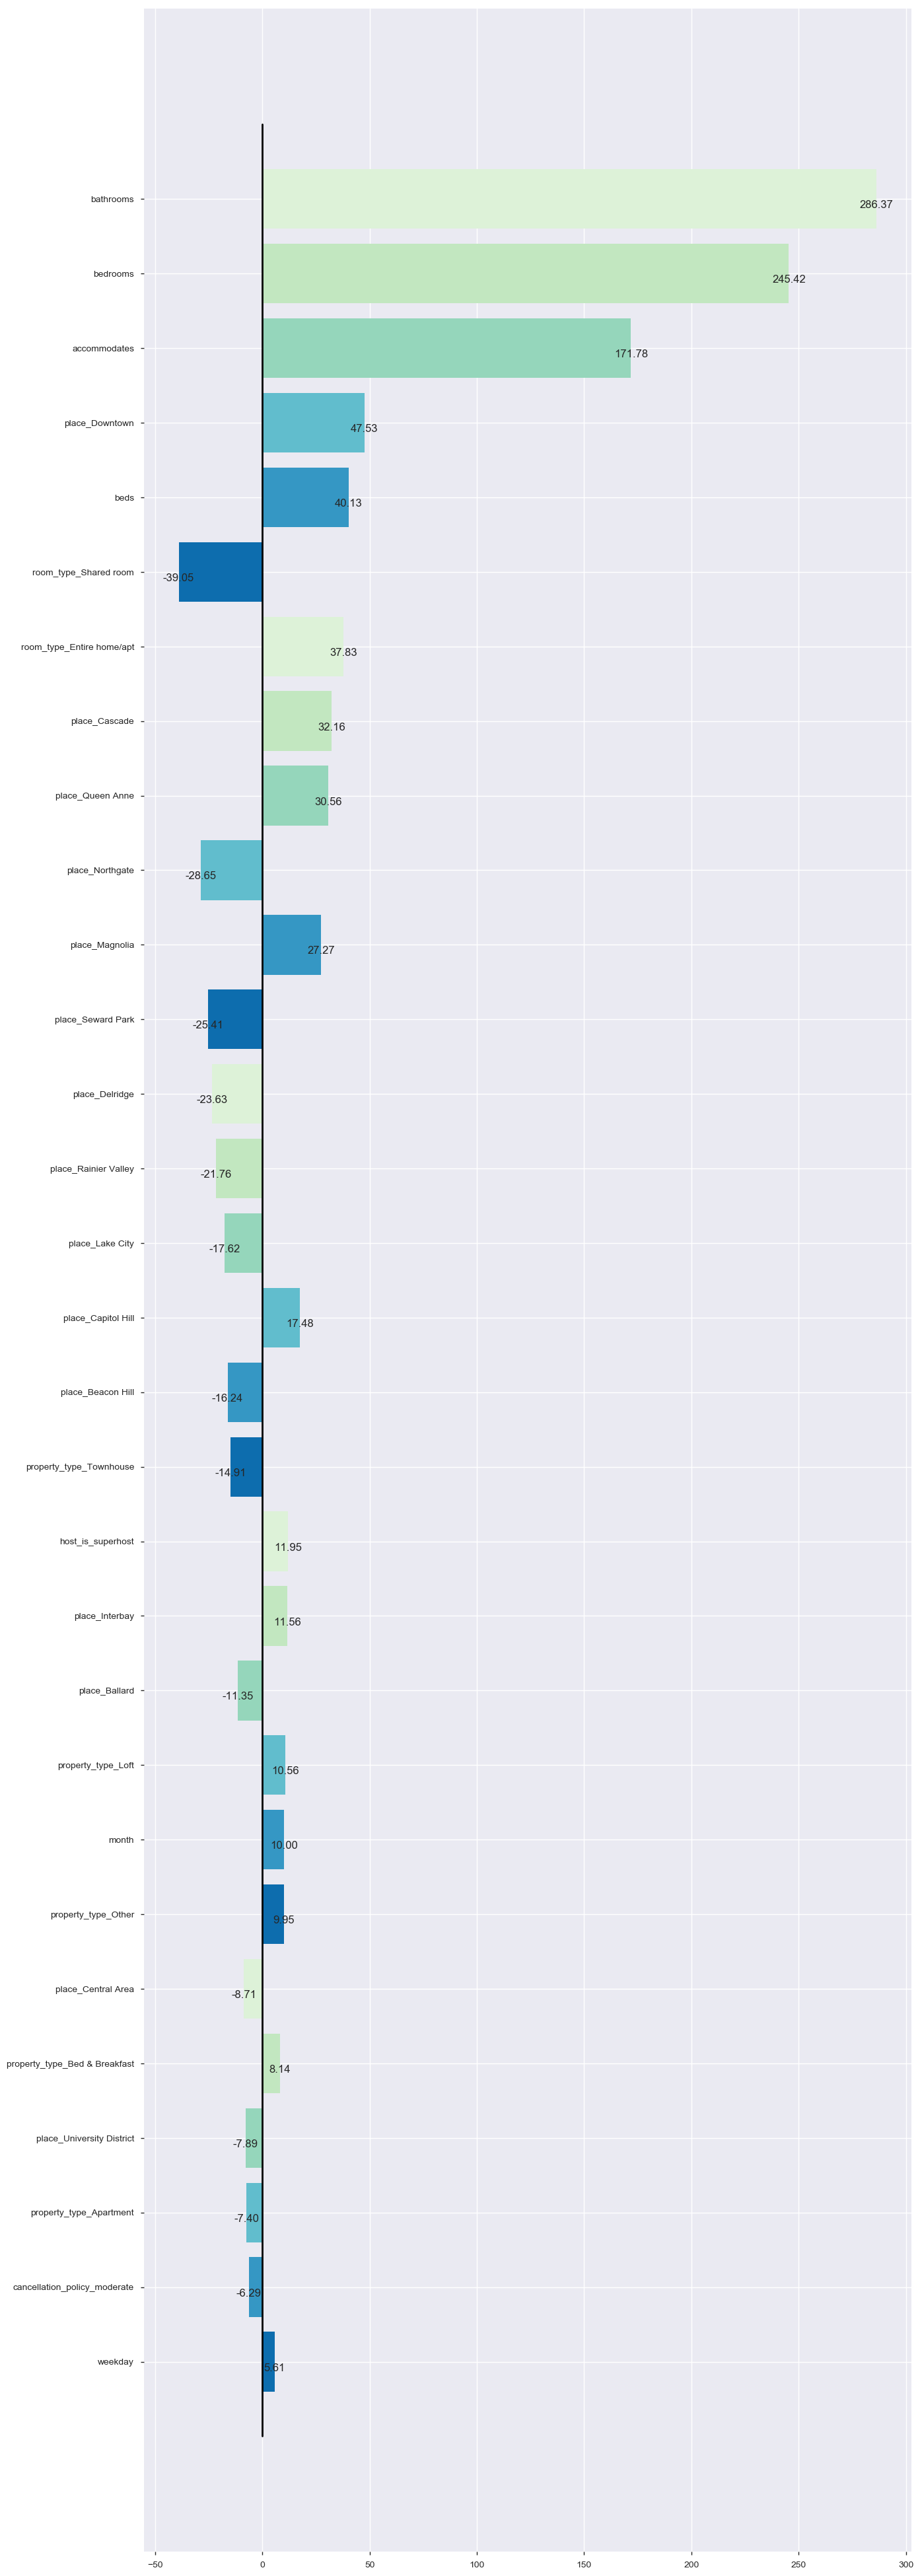

In [101]:
# draw a bar plot with coefficient of features in desending order of absolute value
x = range(30)
y = coef[ind][:30]
    
plt.figure(figsize=(15,50))
ax = plt.subplot()
    
# draw a vertical black line in the middle
plt.plot([0] * (32), range(-1,31), 'k', linewidth=2)

# invert y axis
plt.gca().invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(features.columns[ind][:30])

plt.barh(x, y, color=sns.color_palette('GnBu'))

# adjust position
for rect, label in zip(ax.patches, y):
    if label >= 0:
        width = rect.get_width() + 0.01
    else:
        width = rect.get_width() - 0.01
    label = '{:.2f}'.format(label)
    ax.text(width, rect.get_y()+0.55, label, ha='center', va='bottom', fontsize=12)
    
plt.show()

<a id='discussion'></a>
## Discussion

>    


<a id='conclusion'></a>
## Conclusion

>

<a id='reference'></a>
# References
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Web Scraping Wikipedia Tables using BeautifulSoup and Python](https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722)